# Market Segmentation

## Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing

sns.set()

## Importing Data

In [16]:
data = pd.read_csv("../Datasets/3.12.Market Segmentation.csv")

data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


### Plotting Data

Text(0, 0.5, 'Loyalty')

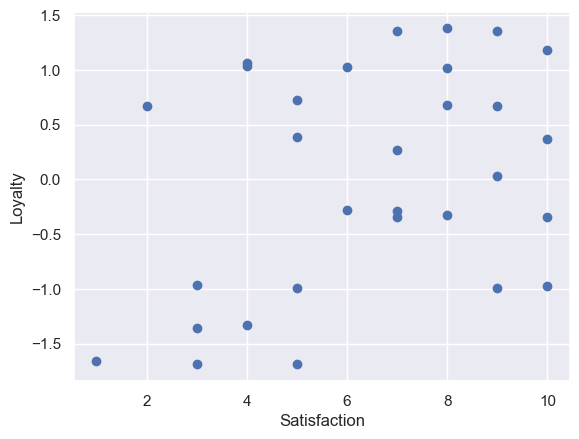

In [4]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### Selecting Features

In [26]:
x = data.copy()

kmeans = KMeans(2)

kmeans.fit(data)

KMeans(n_clusters=2)

In [27]:
clusters = data.copy()
clusters['Clusters'] = kmeans.fit_predict(data)
clusters.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1


Text(0, 0.5, 'Loyalty')

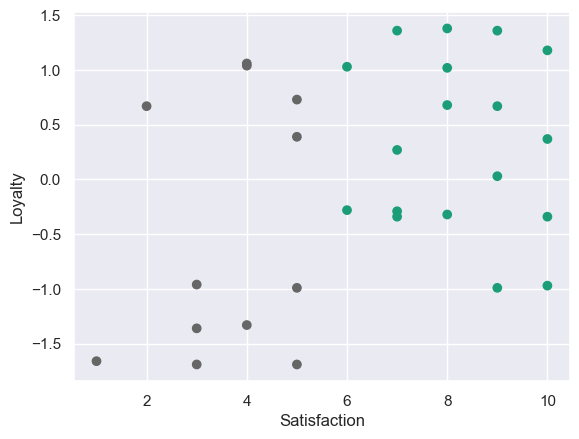

In [28]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c = clusters['Clusters'], cmap = "Dark2")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

### Standardizing Variables

In [29]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Elbow Method

In [32]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[59.99999999999999,
 30.35236058808774,
 18.681930958464623,
 10.24718180592842,
 9.023976139083016,
 6.571285077136385,
 6.327637863678566,
 4.492446080195152,
 4.252834744109421]

Text(0, 0.5, 'WCSS')

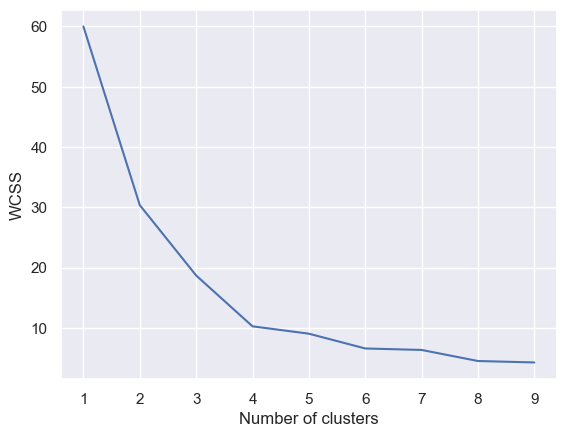

In [34]:
number_of_clusters = range(1,10)
plt.plot(number_of_clusters, wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

### Exploring New Clusters

In [44]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)

clusters_new = data.copy()
clusters_new["Clusters"] = kmeans_new.fit_predict(x_scaled)
clusters_new.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0


Text(0, 0.5, 'Loyalty')

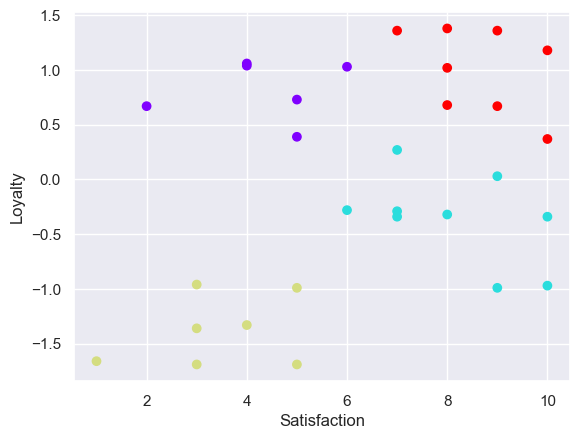

In [45]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['Clusters'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")